# Dimensionality Reduction with Principal Components Analysis (PCA)

In [1]:
# Import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import additional dependencies
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Ignore Python warnings about past model versions
import warnings
warnings.filterwarnings("ignore")

## Elbow Criterion to Determine Optimal Principal Components

In [2]:
# Import datasets
X_train = pd.read_csv("data/x_train.csv", index_col = 0)
X_test = pd.read_csv("data/x_test.csv", index_col = 0)
y_train = pd.read_csv("data/y_train.csv", index_col = 0)
y_test = pd.read_csv("data/y_test.csv", index_col = 0)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

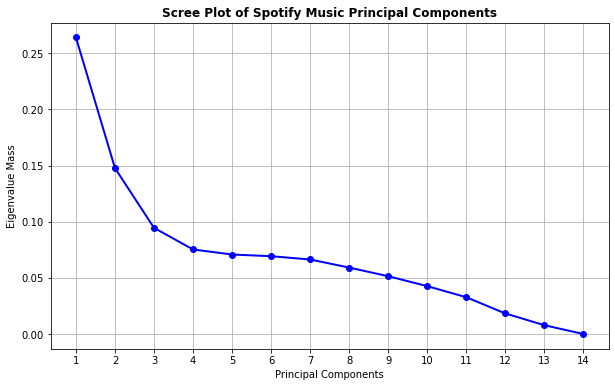

In [3]:
# Perform PCA on the scaled training features
pca = PCA()
X_train_pca = pca.fit_transform(X_train_scaled)

# Calculate eigenvalue mass which is proportion of variance
eigenvalues = pca.explained_variance_ratio_
eigenvalue_mass = eigenvalues.cumsum()

# Display eigenvalue spectrum (scree plot)
components = len(eigenvalues)
plt.figure(figsize = (10,6))
plt.plot(np.arange(1, components + 1), eigenvalues, "bo-", linewidth = 2)
plt.xlabel("Principal Components")
plt.ylabel("Eigenvalue Mass")
plt.title("Scree Plot of Spotify Music Principal Components", fontweight = "bold")
plt.xticks(np.arange(1, components + 1))
plt.grid(True)
plt.show();

I decided to perform **Principal Component Analysis (PCA)** to build a **dimensionality reduction** step on the data. Essentially this allows me to **reduce** the dimensionality of the high-dimensional Spotify data. 

I first wanted to determine the **optimal number of components** to use for the PCA. In this case I analyzed the **eigenvalue spectrum**, also known as the **scree plot**. The scree plot displays the **eigenvalues** or **variance** which is explained by each principal component. This allowed me to identify the number of components that captured the most significant proportion of variance. Based on the elbow criterion, I decided to use the **first 9 principal components**, which as can be seen from the scree plot, to fit the PCA.

## Fitting of PCA onto the Dataset

In [4]:
# Fit PCA onto standardized features considering 9 principal components
pca = PCA(n_components = 9)
X_train_pca = pca.fit_transform(X_train_scaled)

# Transform the test features using the fitted PCA
X_test_scaled = scaler.transform(X_test)
X_test_pca = pca.fit_transform(X_test_scaled)

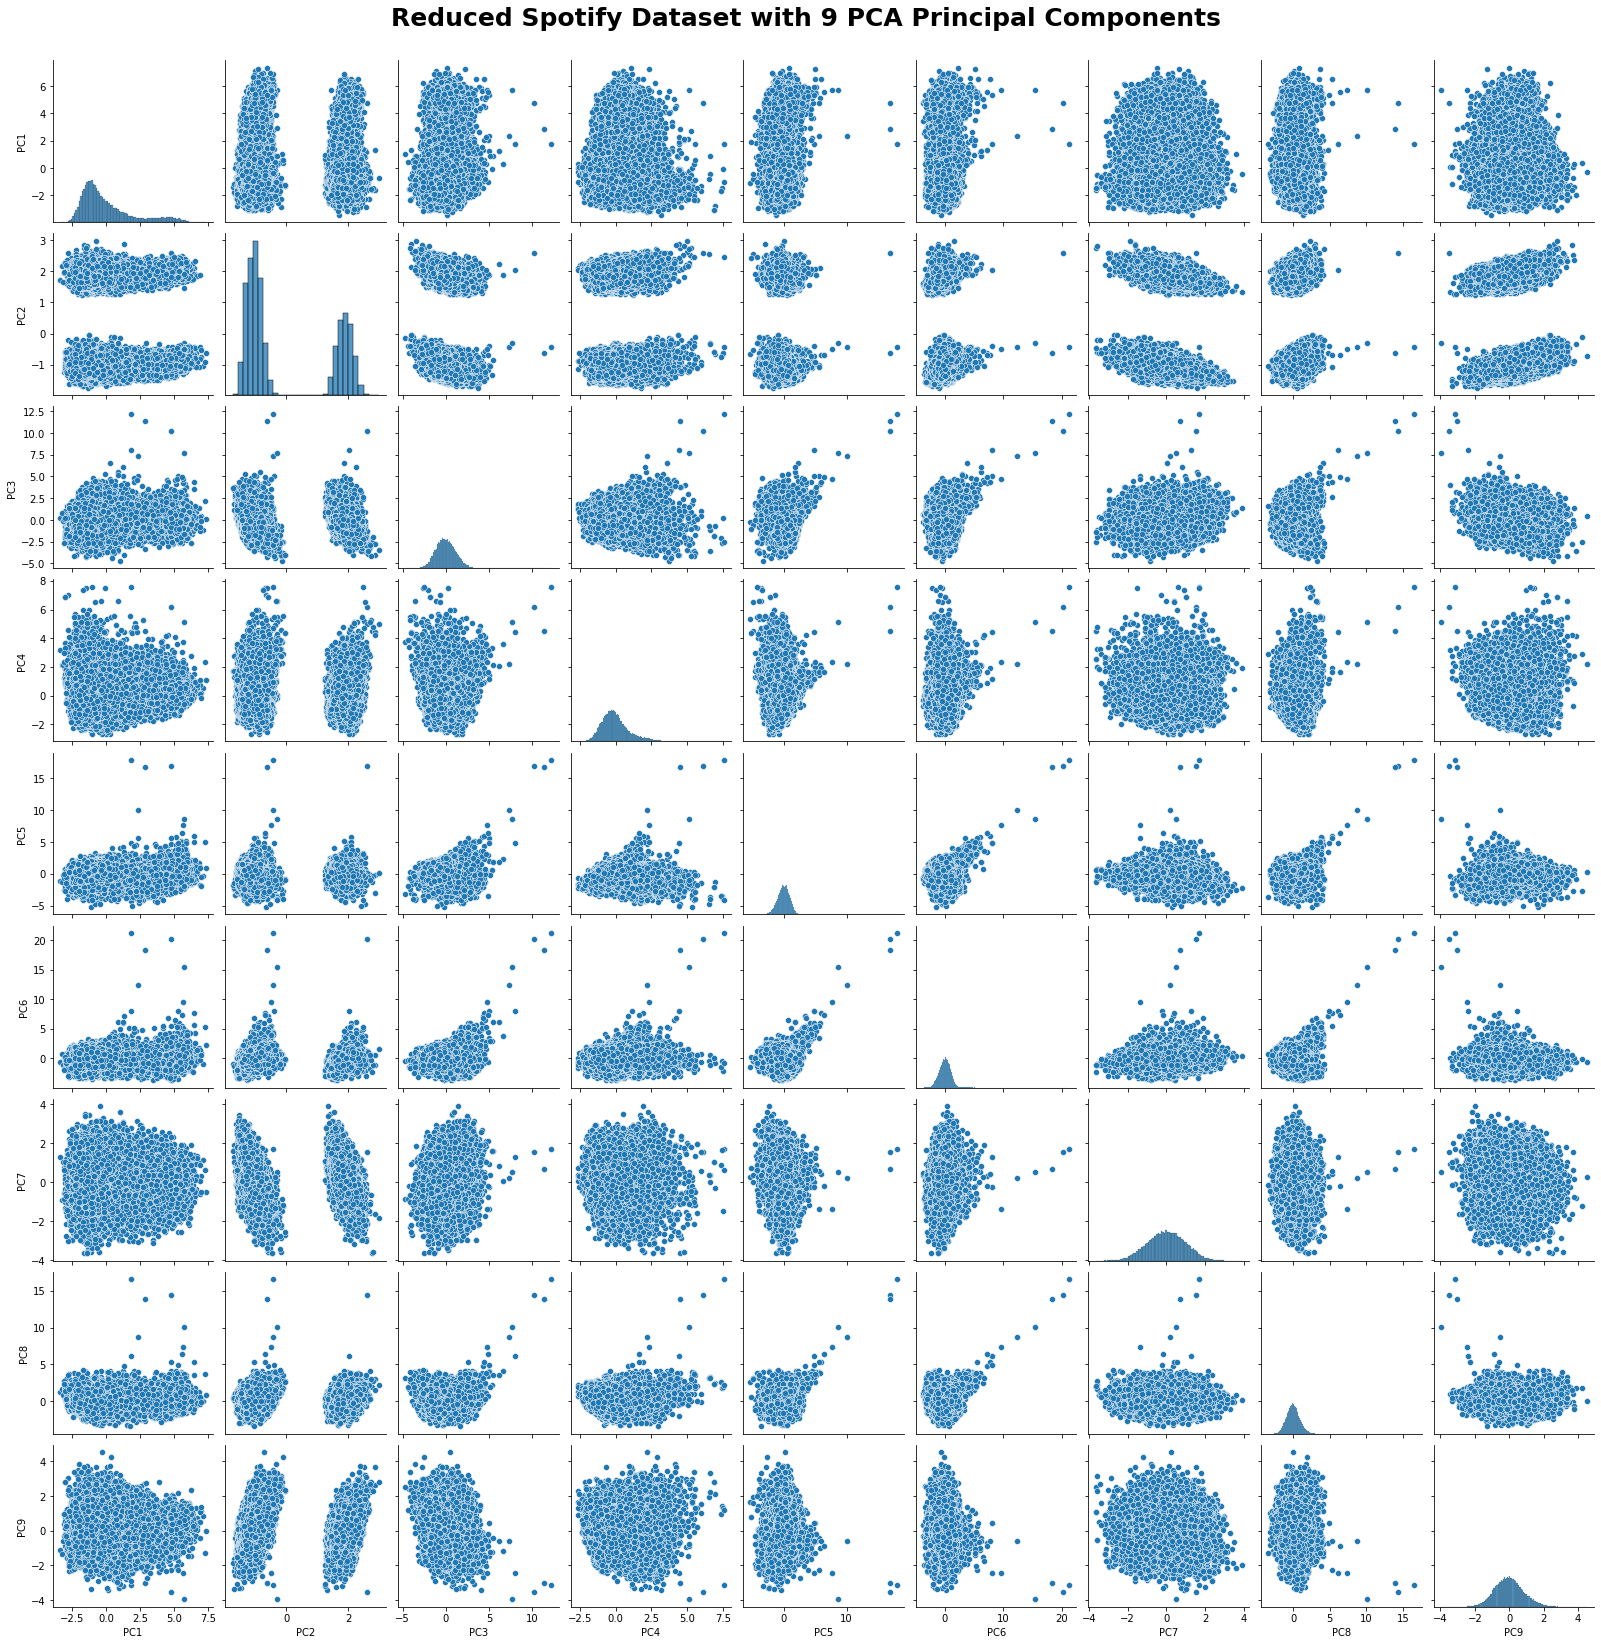

In [5]:
# Import additional dependencies
import seaborn as sns

# Convert PCA transformed data to visualization DataFrame
pca_df = pd.DataFrame(X_train_pca, columns = ["PC1", "PC2", "PC3", "PC4",
                                              "PC5", "PC6", "PC7", "PC8",
                                              "PC9"])

# Display the scatter plot matrix
plot = sns.pairplot(pca_df)
title = "Reduced Spotify Dataset with 9 PCA Principal Components"
plot.fig.suptitle(title, y = 1.02, fontsize = 25, fontweight = "bold")
plt.show();

In [6]:
# Convert PCA reduced Series into DataFrames
X_train_pca = pd.DataFrame(X_train_pca)
X_test_pca = pd.DataFrame(X_test_pca)

# Export DataFrames for external use
X_train_pca.to_csv("data/X_train_pca.csv")
X_test_pca.to_csv("data/X_test_pca.csv")